In [4]:
import torch
import numpy as np

### Zeroth-order gradient estimate:

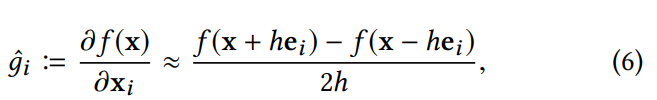

In [5]:
def zero_order_gradient(f, x, i, h=1e-4):
    e_i = torch.zeros_like(x)
    e_i[i] = 1.0
    return (f(x + h * e_i) - f(x - h * e_i)) / (2 * h)
    

def zeroth_order_full_gradient(f, x, h=1e-4):
    p = x.size[0]
    grad_hat = torch.zeros_like(x)

    for i in range(p):
        grad_hat[i] = zero_order_gradient(f, x, i, h)

    return grad_hat

### Zeroth-order ADAM

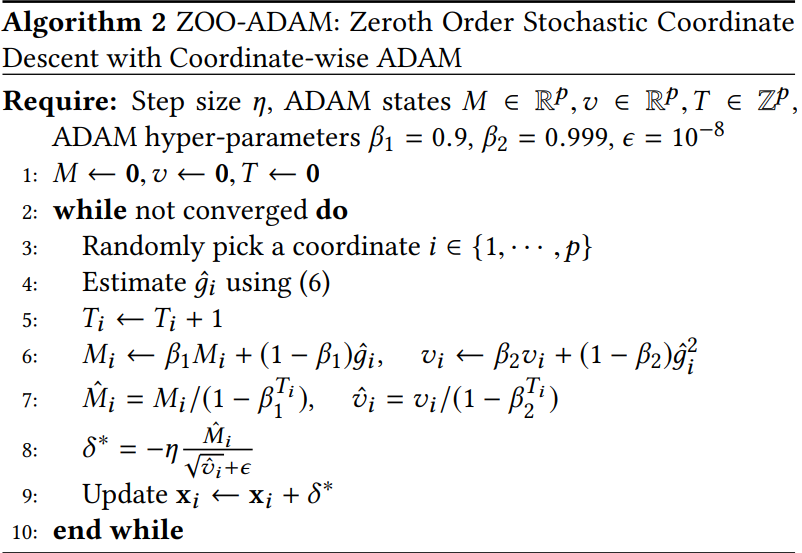

In [ ]:
def zeroth_order_adam(f, x, h, eta, MAX_ITER, beta_1=0.99, beta_2=0.999, eps=1e-8):

    p = x.size[0]
    M = torch.zeros_like(x)
    v = torch.zeros_like(x)
    T = torch.zeros_like(x)

    for _ in range(MAX_ITER):

        i = np.random.randint(p)
        g_hat_i = zero_order_gradient(f, x, i, h)
        T[i] += 1
        M[i] = beta_1 * M[i] + (1 - beta_1) * g_hat_i
        v[i] = beta_2 * v[i] + (1 - beta_2)* g_hat_i**2
        
        M_i_hat = M[i] / (1 - beta_1**T[i])
        V_i_hat = v[i] / (1 - beta_2**T[i])

        delta_star = - eta * M_i_hat / (torch.sqrt(V_i_hat) + eps)
        x[i] += delta_star
        
    return x